# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [134]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [135]:
#Applying the Normalization for each data in the trainingg set, getting values between 0 to 1 of each element
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [136]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [137]:
X_train, y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

### Reshaping

In [138]:
#X_train consists of 3 dimensions now, 1st dim - no of stock prices, 2nd dim - no of timesteps, 3rd dim - no of indicators
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [139]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [140]:
from keras.models import Sequential #for sequence of layers
from keras.layers import Dense #for output layer
from keras.layers import LSTM #for adding LSTM Layer
from keras.layers import Dropout #for the dropout layer

### Initialising the RNN

In [141]:
regressor = Sequential() #it regression since the output id continuous

### Adding the first LSTM layer and some Dropout regularisation

In [142]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #in each iteration of the training 20% of the neurons will be ignored, i.e. 10 neurons will be skipped in each iteration

### Adding a second LSTM layer and some Dropout regularisation

In [143]:
regressor.add(LSTM(units=50, return_sequences=True)) # no input shape is mentioned since input shape needs to be mentioned in the 1st layer
regressor.add(Dropout(0.2)) #in each iteration of the training 20% of the neurons will be ignored, i.e. 10 neurons will be skipped in each iteration

### Adding a third LSTM layer and some Dropout regularisation

In [144]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) #in each iteration of the training 20% of the neurons will be ignored, i.e. 10 neurons will be skipped in each iteration

### Adding a fourth LSTM layer and some Dropout regularisation

In [145]:
regressor.add(LSTM(units=50)) #False since this is the final LSTM layer
regressor.add(Dropout(0.2)) #in each iteration of the training 20% of the neurons will be ignored, i.e. 10 neurons will be skipped in each iteration

### Adding the output layer

In [146]:
regressor.add(Dense(units = 1)) #Dimensions of tge output layer is 1

### Compiling the RNN

In [147]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error') #although RMSprop is the ideal optimizer for RNN,using ada is always safe

### Fitting the RNN to the Training set

In [148]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32) #X_train is the input of the neural network which is the training set , y_train is the ground truth on which we will comapre

Epoch 1/100


2023-01-19 07:07:20.531347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:21.004648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:21.265911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:21.495073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:21.729041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:22.002059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-19 07:07:22.407939: I tensorflow/core/grappler/optimizers/cust

38/38 [==============================] - 15s 184ms/step - loss: 0.0932
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0052
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0035
Epoch 4/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0027
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0026
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0023
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0021
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0019
Epoch 9/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0020
Epoch 10/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0019
Epoch 11/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0019
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0019
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

In [149]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the real stock price of 2017

In [150]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) #as we are adding values vertically, hence axis = 0, if horizonatally then axis = 1
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #converting to numpy array
inputs = inputs.reshape(-1,1)
#scaling of the inputs set
#will just apply transform method since we need to scale the exact same way we did for the training set, hence not fit_transform, only transform
inputs = sc.transform(inputs) 

### Getting the predicted stock price of 2017

In [153]:
X_test = []

#60 previous stock prices and 20 days more for the 20 financial days of JAN
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

#Make the special 3D structure as we did earlier
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 

#Predicted stock price on the X_test
predicted_stock_price = regressor.predict(X_test)


#Inverse the scaled predicted method to get the values in the original form
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price


array([[777.54083],
       [778.47675],
       [779.6985 ],
       [780.8789 ],
       [780.4905 ],
       [781.1358 ],
       [783.328  ],
       [785.65375],
       [786.3426 ],
       [786.45917],
       [786.48474],
       [786.5213 ],
       [786.58813],
       [786.5034 ],
       [786.25665],
       [785.5152 ],
       [781.7595 ],
       [775.83093],
       [773.35706],
       [772.192  ]], dtype=float32)

### Visualising the results

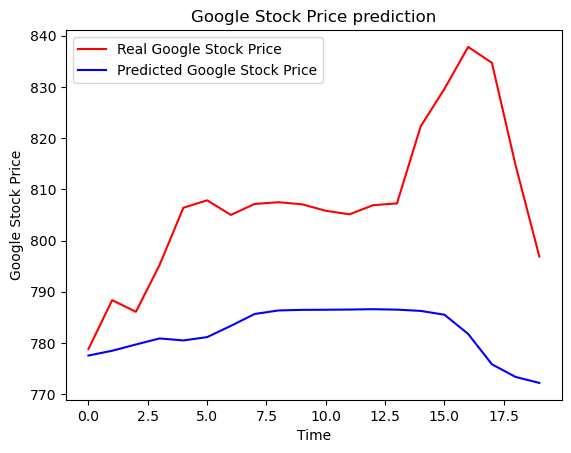

In [154]:
#Will plot the real stock prices of 2017 and the predicted stock price of 2017
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
